Timezone Group 6 - B : 

Ken Chan (mindmothership@gmail.com), 

Handy Gunawan (Handygunawan17@gmail.com), 

Joe Hoong Ng (ng_joehoong@hotmail.com), 

Trai Torsricharoen (traitorsricharoen@gmail.com)

### Introduction

In the first group work, we have shown how to compute individual expected return and standard deviation as well as correlation of two index funds. Furthermore, in this group work, we will show how to plot an efficient frontier plot and show the return-volatility relationship from two index. Finally, we will compare our portfolio performance with a market index (S&P 500).

First, lets download the data, See the first five rows of our XLI and XLE closed price data.

In [2]:
# read in XLE and XLI data from excel sheet using pandas library
# Now, we can use pandas read_excel after installing the excel importer.
#!pip install -q xlrd

import pandas as pd
XLE = pd.read_excel('GWP_PTAP_Data.xlsx', sheet_name="XLE", index_col=0, header=1)
XLI = pd.read_excel('GWP_PTAP_Data.xlsx', sheet_name="XLI", index_col=0, header=1)
df = pd.merge(XLI,XLE,how='left',left_index=True, right_index=True)
df.rename(columns = {'Closing price_x':'XLI','Closing price_y' : 'XLE'}).head()

,XLI,XLE
Date,,
2017-11-27,71.529999,67.190002
2017-11-28,72.620003,67.709999
2017-11-29,73.260002,68.080002
2017-11-30,74.510002,69.099998
2017-12-01,73.589996,69.680000


As a reminder, let's recompute and see the expected returns, annualized volatility and correlation of our index funds.



In [3]:
# Calculate expected return, annualised volatility and correlation as done in the first submission
# Calculate expected return based on CAPM

# Shared paremeters
rf = 0.0225 # Risk-free rate
market_r = 0.09 # Market return

# XLE - parameter
XLE_beta = 1.07

# XLE - Expected return
XLE_r = rf + XLE_beta * (market_r - rf)

# XLI - parameter
XLI_beta = 1.06

# XLI - Expected return
XLI_r = rf + XLI_beta * (market_r - rf)


In [4]:
#@title
# Next we need to calculated volatility
import numpy as np
trading_days_in_year = 252

# Calucalate XLE vol
XLE_lr = np.log(XLE['Closing price']/XLE['Closing price'].shift(1)).dropna()
XLE_daily_vol = XLE_lr.std()
XLE_annual_vol = XLE_daily_vol * np.sqrt(trading_days_in_year)

# Calucalate XLI vol
XLI_lr = np.log(XLI['Closing price']/XLI['Closing price'].shift(1)).dropna()
XLI_daily_vol = XLI_lr.std()
XLI_annual_vol = XLI_daily_vol * np.sqrt(trading_days_in_year)


In [5]:
#@title
# Next we calculate correlation

correlation_mat = np.corrcoef(XLE_lr,XLI_lr)
# get correlation between XLE and XLI
correlation = correlation_mat[0][1]


In [6]:
x = {'Expected Return (%)':[XLE_r*100,XLI_r*100],
     'Annual Volatility (%)':[XLE_annual_vol*100,XLI_annual_vol*100],
     'Correlation (%)':[correlation*100,correlation*100]}

pd.DataFrame(x,index=['XLE','XLI'])

,Expected Return (%),Annual Volatility (%),Correlation (%)
XLE,9.4725,20.319553,65.965022
XLI,9.4050,17.118915,65.965022


# <h3>A) Calculate and draw a scatter plot graph of the efficient frontier based on 11 combinations of XLE and XLI</h3>

In this section we will try to answer part a of the submission 2. 

Since we are looking for the expected return and we expect it will follow it's long term linear relationship with the market index (an assumption needed for the submission), we are using CAPM to calculate the expected return. We do note that last 2 years average yearly return for our index has been negative following our benchmark index S&P500 return. 

Do note that our portfolio being a linear combination of two index will have a linear relationship also as such :


$${Portfolio \;\ Return}=w_{XLI}*{XLI \;\ Return} + w_{XLE} * {XLE \;\ Return}$$


See the return result per weight of portfolio and the resulting plot as below


In [7]:
#@title
# Create numpy array for each weight
w2 = np.linspace(0,1,11)
w1 = 1-w2
counter=np.linspace(1,11,11)
exp_return = w1*XLE_r + w2*XLI_r

from prettytable import PrettyTable
t = PrettyTable(['No.','XLE', 'XLI','Expected Return'])
for i, j, c, d in zip(w1, w2, counter,exp_return):
  t.add_row([ "Portfolio "+ str(int(c)),"{:.0f}%".format(i*100), "{:.0f}%".format(j*100), "{:.04f}%".format(d*100)])
print(t)



+--------------+------+------+-----------------+
|     No.      | XLE  | XLI  | Expected Return |
+--------------+------+------+-----------------+
| Portfolio 1  | 100% |  0%  |     9.4725%     |
| Portfolio 2  | 90%  | 10%  |     9.4657%     |
| Portfolio 3  | 80%  | 20%  |     9.4590%     |
| Portfolio 4  | 70%  | 30%  |     9.4522%     |
| Portfolio 5  | 60%  | 40%  |     9.4455%     |
| Portfolio 6  | 50%  | 50%  |     9.4388%     |
| Portfolio 7  | 40%  | 60%  |     9.4320%     |
| Portfolio 8  | 30%  | 70%  |     9.4253%     |
| Portfolio 9  | 20%  | 80%  |     9.4185%     |
| Portfolio 10 | 10%  | 90%  |     9.4117%     |
| Portfolio 11 |  0%  | 100% |     9.4050%     |
+--------------+------+------+-----------------+


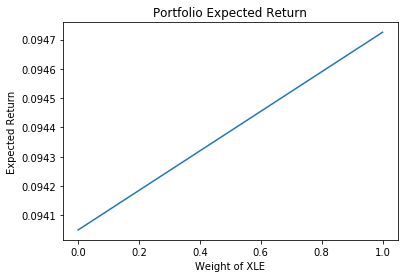

In [8]:
#@title
# Plot result
import matplotlib.pyplot as plt
%matplotlib inline

plt.clf()
plt.title("Portfolio Expected Return")
plt.xlabel("Weight of XLE")
plt.ylabel("Expected Return")
plt.plot(w1,exp_return)
plt.show()

## Calculate portfolio volatility based on given weight

Furthermore, our portfolio volatility has different relationship compared to our returns. The difference stems from the fact that our volatility is univariate and is gotten from taking the root of total squared deviations. See the complete formula below  :


$$\sigma_{p}=\sqrt{\omega_{1}^{2} \sigma_{1}^{2}+\omega_{2}^{2} \sigma_{2}^{2}+2 \omega_{1} \sigma_{1} \omega_{2} \sigma_{2} \rho_{1,2}}$$

where:

$\sigma_{p}=$ volatility of the portfolio 

$\omega_{1}=$ weight of asset 1 in the portfolio 

$\sigma_{1}=$ volatility of asset 1 

$\omega_{2}=$ weight of asset 2 in the portfolio 

$\sigma_{2}=$ volatility of asset 2 

$\rho_{1,2}=$ correlation between asset 1 and asset 2 returns.

Furthemore, we plotted the volatility per portfolio and updated our table.

In [9]:
#@title
# Calculate portfolio volatility based on given weight

port_vol = np.sqrt(w1**2*XLE_annual_vol**2 + w2**2*XLI_annual_vol**2+2*w1*w2*correlation*XLE_annual_vol*XLI_annual_vol)

# Print portfolio volatility
# print("Calculate portfolio volatility based on given weight = ", port_vol)

from prettytable import PrettyTable
t = PrettyTable(['No.','XLE', 'XLI','Expected Return','Portfolio Volatility'])
for i, j, c, d, e in zip(w1, w2, counter,exp_return, port_vol):
  t.add_row([ "Portfolio "+ str(int(c)),"{:.0f}%".format(i*100), "{:.0f}%".format(j*100), "{:.04f}%".format(d*100), "{:.04f}%".format(e*100)])
print(t)


+--------------+------+------+-----------------+----------------------+
|     No.      | XLE  | XLI  | Expected Return | Portfolio Volatility |
+--------------+------+------+-----------------+----------------------+
| Portfolio 1  | 100% |  0%  |     9.4725%     |       20.3196%       |
| Portfolio 2  | 90%  | 10%  |     9.4657%     |       19.4594%       |
| Portfolio 3  | 80%  | 20%  |     9.4590%     |       18.6921%       |
| Portfolio 4  | 70%  | 30%  |     9.4522%     |       18.0294%       |
| Portfolio 5  | 60%  | 40%  |     9.4455%     |       17.4834%       |
| Portfolio 6  | 50%  | 50%  |     9.4388%     |       17.0650%       |
| Portfolio 7  | 40%  | 60%  |     9.4320%     |       16.7840%       |
| Portfolio 8  | 30%  | 70%  |     9.4253%     |       16.6472%       |
| Portfolio 9  | 20%  | 80%  |     9.4185%     |       16.6583%       |
| Portfolio 10 | 10%  | 90%  |     9.4117%     |       16.8169%       |
| Portfolio 11 |  0%  | 100% |     9.4050%     |       17.1189% 

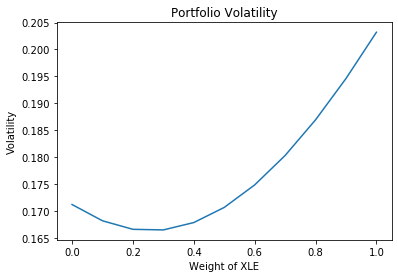

In [10]:
#@title
# Plot result

plt.clf()
plt.title("Portfolio Volatility")
plt.xlabel("Weight of XLE")
plt.ylabel("Volatility")
plt.plot(w1,port_vol)
plt.show()

### Scatter plot graph of the efficient frontier

Now that we get the portoflio return and volatility, we can draw our efficient frontier. it is essentially just a plot of all possible values of our portfolio return on the y axis and volatility on the x axis. the values are calculated by counting all the possible weight combination of index funds constructing our portfolio


As we see that the volatility has a slope and minimum point. We identify that by constructing a portfolio, we can reduce our risk when compared to investing in a single funds. the reduced risk comes from the fact that the volatility of each index funds are not perfectly correlated, meaning that the swing in both our index returns might not happen at the same time or in same directions. hence, netting off each other movements.


From our result, we analyzed that :

- Portfolio 8(in green) is the global minimum variance portfolio. This is the portfolio on the efficient frontier which has the lowest volatility

- portfolio 1 to 7 are known as the efficient frontier, which has the highest return for a given level of volatility.

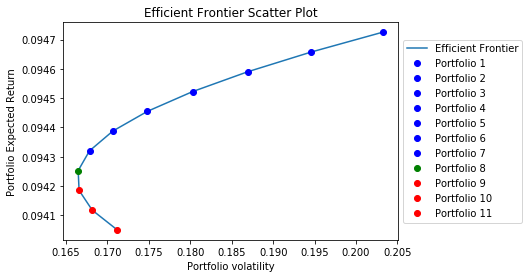

In [11]:
#@title
import numpy as np
import matplotlib
colors={0:"blue", 1:"blue",2:"blue",3:"blue",4:"blue",5:"blue",6:"blue",7:"green",8:"red",9:"red",10:"red"}
PortfolioLabel={0:"Portfolio 1",1:"Portfolio 2",2:"Portfolio 3",3:"Portfolio 4",4:"Portfolio 5",5:"Portfolio 6",6:"Portfolio 7",7:"Portfolio 8",8:"Portfolio 9",9:"Portfolio 10",10:"Portfolio 11",}
plt.clf()
plt.title("Efficient Frontier Scatter Plot")
plt.xlabel("Portfolio volatility")
plt.ylabel("Portfolio Expected Return")
plt.plot(port_vol,exp_return,label="Efficient Frontier")
for j in range (0, 11):
  plt.plot(port_vol[j],exp_return[j],'o',color=colors[j],label=PortfolioLabel[j])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# <h3>B) Select a portfolio from portfolios 1-11 on the efficient frontier that satisfies the following constraints:</h3>

In this task, we aim to find a portfolio for our investor. They come with a specific request for constrains. Many times our investor will require us to follow a specific constrains such as the sectors of our index funds, target return, volatility, or some performance ratio. for this specific case the constrains are :
- The return is greater than 9.43%
- The volatility is not greater than 16.8%

After checking our possible portfolios we find that

Portfolio 7 consist 40 % of XLE and 60 % of XLI has satisfy the investment constraint with its return of 9.432 % and volatility of 16.784 %. Do note tat a small number of increments below our portfolio 7 also fulfills the requirement. Below is the resulting test and plot of our tests.


In [12]:
# Looking for portfolios that satisfy our conditions
select_port_con1 = np.greater(exp_return,0.0943)
select_port_con2 = np.less_equal(port_vol,0.168)
select_port = np.logical_and(select_port_con1,select_port_con2)
counter=np.linspace(1,11,11)

from prettytable import PrettyTable
t = PrettyTable(['No.','return>9.43%','volatility<=16.8%','Both conditions'])
for con1,con2,con1_2, c in zip(select_port_con1,select_port_con2, select_port, counter):
  t.add_row([ "Portfolio "+ str(int(c)),con1,con2,con1_2])
print(t)


+--------------+--------------+-------------------+-----------------+
|     No.      | return>9.43% | volatility<=16.8% | Both conditions |
+--------------+--------------+-------------------+-----------------+
| Portfolio 1  |     True     |       False       |      False      |
| Portfolio 2  |     True     |       False       |      False      |
| Portfolio 3  |     True     |       False       |      False      |
| Portfolio 4  |     True     |       False       |      False      |
| Portfolio 5  |     True     |       False       |      False      |
| Portfolio 6  |     True     |       False       |      False      |
| Portfolio 7  |     True     |        True       |       True      |
| Portfolio 8  |    False     |        True       |      False      |
| Portfolio 9  |    False     |        True       |      False      |
| Portfolio 10 |    False     |       False       |      False      |
| Portfolio 11 |    False     |       False       |      False      |
+--------------+----

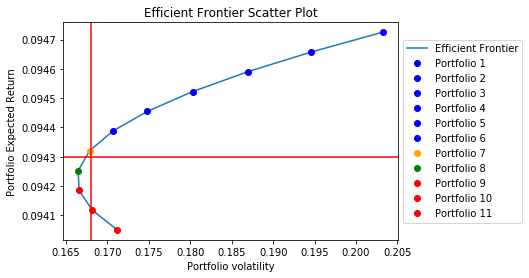

In [13]:
#@title
import numpy as np
import matplotlib
returnCriteria = 9.43/100
volatilityCriteria = 16.8/100
colors={0:"blue", 1:"blue",2:"blue",3:"blue",4:"blue",5:"blue",6:"orange",7:"green",8:"red",9:"red",10:"red"}
PortfolioLabel={0:"Portfolio 1",1:"Portfolio 2",2:"Portfolio 3",3:"Portfolio 4",4:"Portfolio 5",5:"Portfolio 6",6:"Portfolio 7",7:"Portfolio 8",8:"Portfolio 9",9:"Portfolio 10",10:"Portfolio 11",}
plt.clf()
plt.title("Efficient Frontier Scatter Plot")
plt.xlabel("Portfolio volatility")
plt.ylabel("Portfolio Expected Return")
plt.plot(port_vol,exp_return,label="Efficient Frontier")

for j in range (0, 11):
  plt.plot(port_vol[j],exp_return[j],'o',color=colors[j],label=PortfolioLabel[j])

plt.axhline(returnCriteria, color='r', linestyle='-')
plt.axvline(volatilityCriteria, color='r')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# <h3>C) Comment on how the portfolio selected in Submission 2(b) is expected to perform relative to the S&P 500 in terms of the following:</h3>


- Return
- Risk 
- Risk-adjusted return (e.g. Sharpe Ratio)

We approach this question with 2 different methods:

1) Using actual historical returns as expected future returns, or, 

2) Using CAPM model to estimate expected future returns

Both methods are usable, it depends on how confident we are with the future results and the time span of returns we are looking for (next 1 month, year or decades). There are also methods to forecast the future returns based on historical and or our expected returns. However, we answers the question using the two scenarios above.

First, check out the historical data :


In [14]:
#@title
# We calculate the daily log returns of the 40:60 XLE:XLI portfolio
logreturns_df = pd.concat([XLE_lr, XLI_lr], keys=['XLE', 'XLI'], axis=1)
logreturns_df['Port'] = 0.4* logreturns_df['XLE'] + 0.6 * logreturns_df['XLI']
# We import S&P 500 price
SP500 = pd.read_excel('GWP_PTAP_Data.xlsx', sheet_name="S&P500", index_col=0, header=1)
SP500_lr = np.log(SP500['Close']/SP500['Close'].shift(1)).dropna()
logreturns_df = logreturns_df.join(SP500_lr.to_frame(name="SP500"))
logreturns_df['ActiveRet'] = logreturns_df['Port'] - logreturns_df['SP500']
logreturns_df.head()


,XLE,XLI,Port,SP500,ActiveRet
Date,,,,,
2017-11-28,0.007709,0.015123,0.012158,0.009800,0.002358
2017-11-29,0.005450,0.008774,0.007444,-0.000369,0.007814
2017-11-30,0.014871,0.016919,0.016100,0.008158,0.007942
2017-12-01,0.008359,-0.012424,-0.004111,-0.002027,-0.002085
2017-12-04,-0.000431,0.008390,0.004862,-0.001053,0.005914


Furthermore, We build a comparison of both historical and CAPM induced returns and performance summary. However since we have no information for the volatility other than the historical volatility, we only use the historical value to count our volatility.

From the results below we can see that historically, our returns are negative. this fact is reflected also on our risk adjusted returns. however, by way of CAPM our returns are positive. Now, we can understand that the volatility(risk) of our market benchmark are high (0.148), and has differences to our portfolio (0.16). compared to the returns of and risk of our portfolio, the benchmark does not differ so much.

However, there are still merits in building our portfolio (if assumed our portfolio performance will follow that of CAPM) as reflected in the positive sharpe, information and treynor ratio. The sharpe shows we have added value compared to risk free rate, information shows the additional amount of return we got after each risk we take. and treynor shows the additional return if we build a portfolio compared to the portfolio beta.

In [15]:
return_table = {"Historical Expected Return" : np.mean(logreturns_df)*trading_days_in_year,
                "Volatility" : np.std(logreturns_df)*np.sqrt(trading_days_in_year)}
return_table = pd.DataFrame(return_table).T
return_table['Portfolio - SP500'] =  return_table['Port']-return_table['SP500']

In [16]:
active_return = logreturns_df['ActiveRet'].mean()
active_risk = logreturns_df['Port'].std()-logreturns_df['SP500'].std()

from scipy import stats
(port_beta, port_alpha) = stats.linregress(logreturns_df['SP500'],
                logreturns_df['Port'])[0:2]

treynor_ratio = (logreturns_df['ActiveRet'].mean()-rf)/port_beta
summary_table = {"Sharpe Ratio" : (logreturns_df['ActiveRet'].mean()-rf)/logreturns_df['Port'].std(),
                 "Information Ratio" : active_return/active_risk,
                 "Portfolio Beta": round(port_beta, 4),
                 "Treynor Ratio":(logreturns_df['ActiveRet'].mean()-rf)/port_beta}
summary_table = pd.DataFrame(summary_table,index=["Historical"])


In [17]:
CAPM_return_table = {'XLE':XLE_r,
    'XLI':XLI_r,
        'Port':exp_return[6],
            'SP500':market_r,
                'ActiveRet':exp_return[6] - market_r,
                    'Portfolio - SP500' : exp_return[6] - market_r}
CAPM_return_table = pd.DataFrame(CAPM_return_table,index=["CAPM Expected Return"])
return_table = pd.concat([CAPM_return_table,return_table])
return_table

,XLE,XLI,Port,SP500,ActiveRet,Portfolio - SP500
CAPM Expected Return,0.094725,0.094050,0.094320,0.090000,0.004320,0.004320
Historical Expected Return,-0.050449,-0.025690,-0.035594,0.011995,-0.047588,-0.047588
Volatility,0.202789,0.170846,0.167504,0.148295,0.081682,0.019209


In [18]:
CAPM_summary_table = {"Sharpe Ratio" : (exp_return[6]-rf)/port_vol[6],
                 "Information Ratio" : (exp_return[6] - market_r)/(port_vol[6]-return_table.iloc[-1,3]),
                 "Portfolio Beta": w1[6]*XLE_beta+w2[6]*XLI_beta,
                 "Treynor Ratio":((exp_return[6]-rf)/( w1[6]*XLE_beta+w2[6]*XLI_beta))}
CAPM_summary_table = pd.DataFrame(CAPM_summary_table,index=["CAPM"])
pd.concat([CAPM_summary_table,summary_table])

,Sharpe Ratio,Information Ratio,Portfolio Beta,Treynor Ratio
CAPM,0.427908,0.221025,1.0640,0.067500
Historical,-2.145940,-0.155746,0.9862,-0.023006


# <h3>D) Comment on the appropriateness of the S&P 500 as a benchmark for the portfolio and conclusion</h3> 

XLE represents all energy stocks in the S&P500 index, while XLI represents all industrial stocks in the S&P500 index. Thus, there is some overlap between our portfolio and  S&P500 as a benchmark as they represent the same universe of 500 large-capitalization US stocks, yet there is some differentiation between the portfolio and the benchmark (via different sector weightages), making calculations and interpretation of active return meaningful.

With S&P500 as the benchmark, we will be able to determine if the outperformance of our portfolio comes from an "allocation effect", as we have weighted different sectors of the S&P500 index differently. There would be no selection or interaction effect present as we did not select individual stocks.

**References**

coding finance. (2018). How to calculate portfolio beta in Python. Retrieved from https://www.codingfinance.com/post/2018-04-25-portfolio-beta-py/

State Street Global Advisors SPDR. (2020). The Energy Select Sector SPDR Fund. Retrieved from https://www.ssga.com/library-content/products/factsheets/etfs/us/factsheet-us-en-xle.pdf

State Street Global Advisors SPDR. (2020). The Industrial Select Sector SPDR Fund. Retrieved from https://www.ssga.com/library-content/products/factsheets/etfs/us/factsheet-us-en-xli.pdf